In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

## 0. Load and plot data

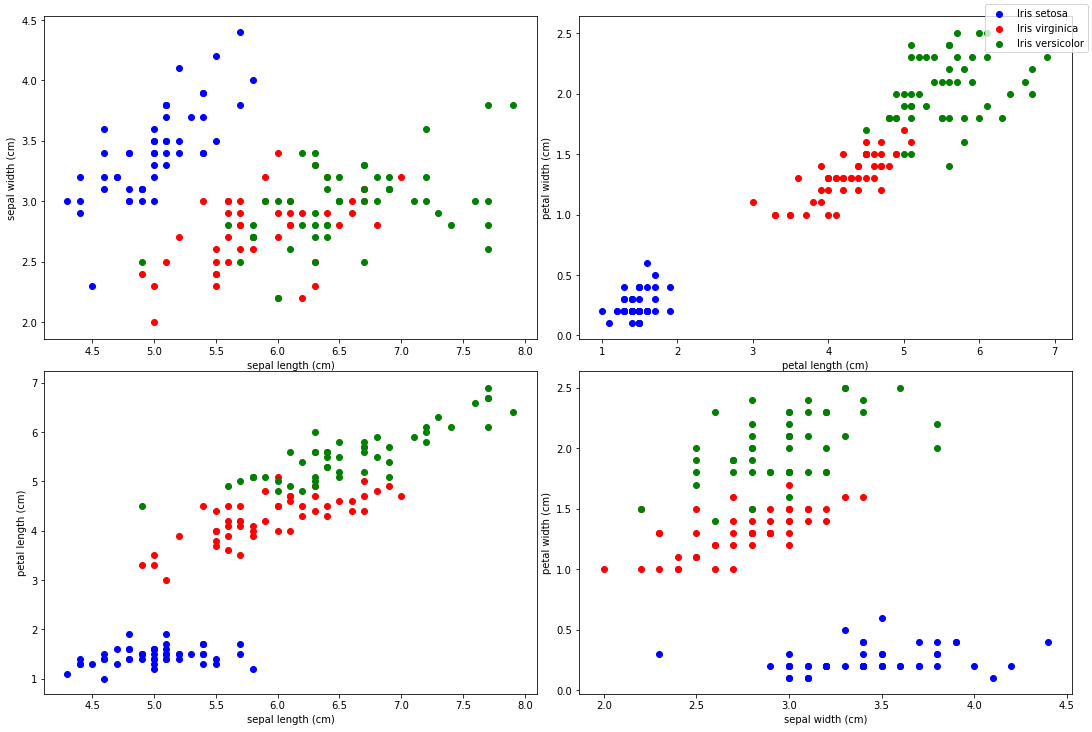

In [11]:
df = pd.read_csv('../master/data/iris.csv')
df.shape
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout()
plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target'] == j][x], df[df['target'] == j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=1)
plt.show()

## 1- Using PyTorch's Dataset and DataLoader classes

In [13]:
X = df.drop('target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

train_data=TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=120, shuffle=True)
test_data=TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))
test_loader = torch.utils.data.DataLoader(test_data,batch_size=10000, shuffle=True)

## 2- Model

In [14]:
class Model(nn.Module):
    def __init__(self, in_features=4, h=[8,9], out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h[0])  # input layer
        self.fc2 = nn.Linear(h[0], h[1])  # hidden layer
        self.out = nn.Linear(h[1], out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

torch.manual_seed(1)
model = Model()

## 3- Training

epoch:  0  batch"  0 loss: 1.19859314
epoch:  1  batch"  0 loss: 1.13832688
epoch:  2  batch"  0 loss: 1.08991373
epoch:  3  batch"  0 loss: 1.06219459
epoch:  4  batch"  0 loss: 1.03867650
epoch:  5  batch"  0 loss: 1.02091098
epoch:  6  batch"  0 loss: 1.00650883
epoch:  7  batch"  0 loss: 0.99103922
epoch:  8  batch"  0 loss: 0.97465819
epoch:  9  batch"  0 loss: 0.95716000
epoch: 10  batch"  0 loss: 0.93830818
epoch: 11  batch"  0 loss: 0.91807914
epoch: 12  batch"  0 loss: 0.89710706
epoch: 13  batch"  0 loss: 0.87547243
epoch: 14  batch"  0 loss: 0.85181868
epoch: 15  batch"  0 loss: 0.82544625
epoch: 16  batch"  0 loss: 0.79825324
epoch: 17  batch"  0 loss: 0.77313405
epoch: 18  batch"  0 loss: 0.74897891
epoch: 19  batch"  0 loss: 0.72411293
epoch: 20  batch"  0 loss: 0.69950837
epoch: 21  batch"  0 loss: 0.67598414
epoch: 22  batch"  0 loss: 0.65292197
epoch: 23  batch"  0 loss: 0.63019902
epoch: 24  batch"  0 loss: 0.60746157
epoch: 25  batch"  0 loss: 0.58481723
epoch: 26  b

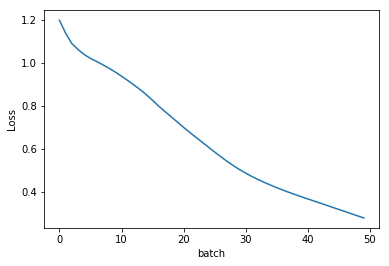

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer.zero_grad()
epochs = 50
losses = []
for e in range(epochs):
    for b,(x,y_train) in enumerate(train_loader):
        y_pred = model.forward(x)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())

        if b % 10 == 0:
            print(f'epoch: {e:2}  batch" {b:2} loss: {loss.item():10.8f}')
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
else:
    # -----------------Ploting Loss function
    plt.plot(range(len(losses)), losses)
    plt.ylabel('Loss')
    plt.xlabel('batch');
    # ----------------Validate the model
    with torch.no_grad():
        print(f'Total loss on Validation data is: {loss:.8f}')
        # --------------------number of corretc predctions
        optimizer.zero_grad()
        correct = 0
        for b,(x,labels) in enumerate(test_loader):
            preds = model.forward(x)
            preds_label=[i.argmax().item() for i in preds]
        correct_preds=len([i for i, j in zip(preds_label, labels) if i == j])
        print(f'\n{correct_preds} out of {len(labels)} = {100 * correct_preds / len(labels):.2f}% correct')



## 4- Classifying new unseen data

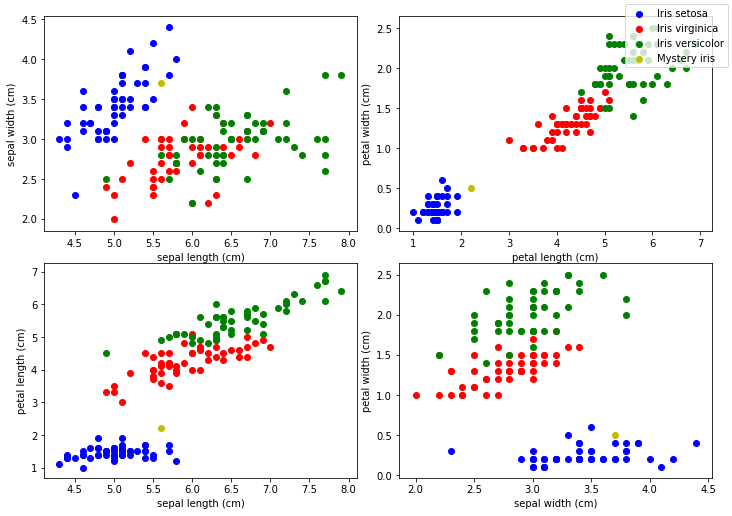

tensor([ 2.1452, -1.1402, -3.1242])
Iris setosa


In [16]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()
plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor', 'Mystery iris']
for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target'] == j][x], df[df['target'] == j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')
fig.legend(labels=labels)
plt.show()

with torch.no_grad():
    print(model(mystery_iris))
    print(labels[model(mystery_iris).argmax()])